# Scrape

In [55]:
!pip install pandas matplotlib numpy openpyxl seaborn


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd

def parse_custom_date(date_str):
    date_str = str(date_str).strip()  # Convert to string and strip spaces
    
    # Handle empty or nan-like values
    if date_str in ['nan', 'NaN', '', None]:
        return pd.NaT
    
    # Length checks (you can adjust if needed)
    length = len(date_str)
    
    try:
        if length == 10 and '-' in date_str:  # Format YYYY-MM-DD, e.g. 2001-01-01 or 2025-01-01
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        elif length == 11 and '-' in date_str:  # Format DD-MMM-YYYY e.g. 01-JAN-2019
            return pd.to_datetime(date_str, format='%d-%b-%Y')
        elif length == 9 and '-' in date_str:  # Format DD-Mmm-YY e.g. 01-Jan-23
            return pd.to_datetime(date_str, format='%d-%b-%y')
        else:
            # Fallback to pandas default parsing
            return pd.to_datetime(date_str, errors='coerce')
    except Exception:
        return pd.NaT


In [ ]:
import os

path = './demanddata/'
files = [f for f in os.listdir(path) if f.endswith('.csv')]

dfs = []

for file in files:
    temp_df = pd.read_csv(os.path.join(path, file))
    temp_df['SETTLEMENT_DATE'] = temp_df['SETTLEMENT_DATE'].apply(parse_custom_date)
    dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)

print(f"Total rows combined: {len(df)}")
print(f"Missing dates after parsing: {df['SETTLEMENT_DATE'].isna().sum()}")

print(len(df))


In [ ]:
df.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,...,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW
0,2001-01-01,1,38631,NaN,34060,NaN,NaN,NaN,NaN,0,...,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-01,2,39808,NaN,35370,NaN,NaN,NaN,NaN,0,...,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,3,40039,NaN,35680,NaN,NaN,NaN,NaN,0,...,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-01,4,39339,NaN,35029,NaN,NaN,NaN,NaN,0,...,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,5,38295,NaN,34047,NaN,NaN,NaN,NaN,0,...,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

df.head()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow,greenlink_flow
0,2001-01-01,1,38631,NaN,34060,NaN,NaN,NaN,NaN,0,...,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-01,2,39808,NaN,35370,NaN,NaN,NaN,NaN,0,...,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,3,40039,NaN,35680,NaN,NaN,NaN,NaN,0,...,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-01,4,39339,NaN,35029,NaN,NaN,NaN,NaN,0,...,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,5,38295,NaN,34047,NaN,NaN,NaN,NaN,0,...,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.isna().sum())

settlement_date                   0
settlement_period                 0
nd                                0
tsd                           70128
england_wales_demand              0
embedded_wind_generation     105168
embedded_wind_capacity       105168
embedded_solar_generation    140256
embedded_solar_capacity      140256
non_bm_stor                       0
pump_storage_pumping              0
scottish_transfer            385680
ifa_flow                          0
ifa2_flow                    140256
britned_flow                 140256
moyle_flow                    70128
east_west_flow               140256
nemo_flow                    140256
nsl_flow                     315552
eleclink_flow                315552
viking_flow                  315552
greenlink_flow               315552
dtype: int64


In [ ]:
df.nunique()

settlement_date               9042
settlement_period               50
nd                           39473
tsd                          36960
england_wales_demand         35730
embedded_wind_generation      5634
embedded_wind_capacity         186
embedded_solar_generation     9979
embedded_solar_capacity       3373
non_bm_stor                    583
pump_storage_pumping          1981
scottish_transfer             7813
ifa_flow                      4111
ifa2_flow                     2035
britned_flow                  2126
moyle_flow                     892
east_west_flow                1058
nemo_flow                     2046
nsl_flow                      2715
eleclink_flow                 2029
viking_flow                   2576
greenlink_flow                 966
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434014 entries, 0 to 434013
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   settlement_date            434014 non-null  datetime64[ns]
 1   settlement_period          434014 non-null  int64         
 2   nd                         434014 non-null  int64         
 3   tsd                        363886 non-null  float64       
 4   england_wales_demand       434014 non-null  int64         
 5   embedded_wind_generation   328846 non-null  float64       
 6   embedded_wind_capacity     328846 non-null  float64       
 7   embedded_solar_generation  293758 non-null  float64       
 8   embedded_solar_capacity    293758 non-null  float64       
 9   non_bm_stor                434014 non-null  int64         
 10  pump_storage_pumping       434014 non-null  int64         
 11  scottish_transfer          48334 non-null   float64 

In [ ]:
# Ensure date is datetime
df['settlement_date'] = pd.to_datetime(df['settlement_date'])

# Fill generation/flow columns missing values with zero
cols_fill_zero = [
    'embedded_wind_generation', 'embedded_wind_capacity',
    'embedded_solar_generation', 'embedded_solar_capacity',
    'ifa2_flow', 'britned_flow', 'east_west_flow',
    'nemo_flow', 'nsl_flow', 'eleclink_flow',
    'viking_flow', 'greenlink_flow','moyle_flow'
]
df[cols_fill_zero] = df[cols_fill_zero].fillna(0)
df = df.drop(columns=['scottish_transfer'])

In [ ]:
df_cleaned = df.copy()

In [ ]:
df['tsd'] = df['tsd'].fillna(method='bfill')


C:\Users\thoma\AppData\Local\Temp\ipykernel_20472\266043753.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tsd'] = df['tsd'].fillna(method='bfill')


In [ ]:
print(df.isna().sum())

settlement_date              0
settlement_period            0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
nsl_flow                     0
eleclink_flow                0
viking_flow                  0
greenlink_flow               0
dtype: int64


In [ ]:
df.dtypes

settlement_date              datetime64[ns]
settlement_period                     int64
nd                                    int64
tsd                                 float64
england_wales_demand                  int64
embedded_wind_generation            float64
embedded_wind_capacity              float64
embedded_solar_generation           float64
embedded_solar_capacity             float64
non_bm_stor                           int64
pump_storage_pumping                  int64
ifa_flow                              int64
ifa2_flow                           float64
britned_flow                        float64
moyle_flow                          float64
east_west_flow                      float64
nemo_flow                           float64
nsl_flow                            float64
eleclink_flow                       float64
viking_flow                         float64
greenlink_flow                      float64
dtype: object

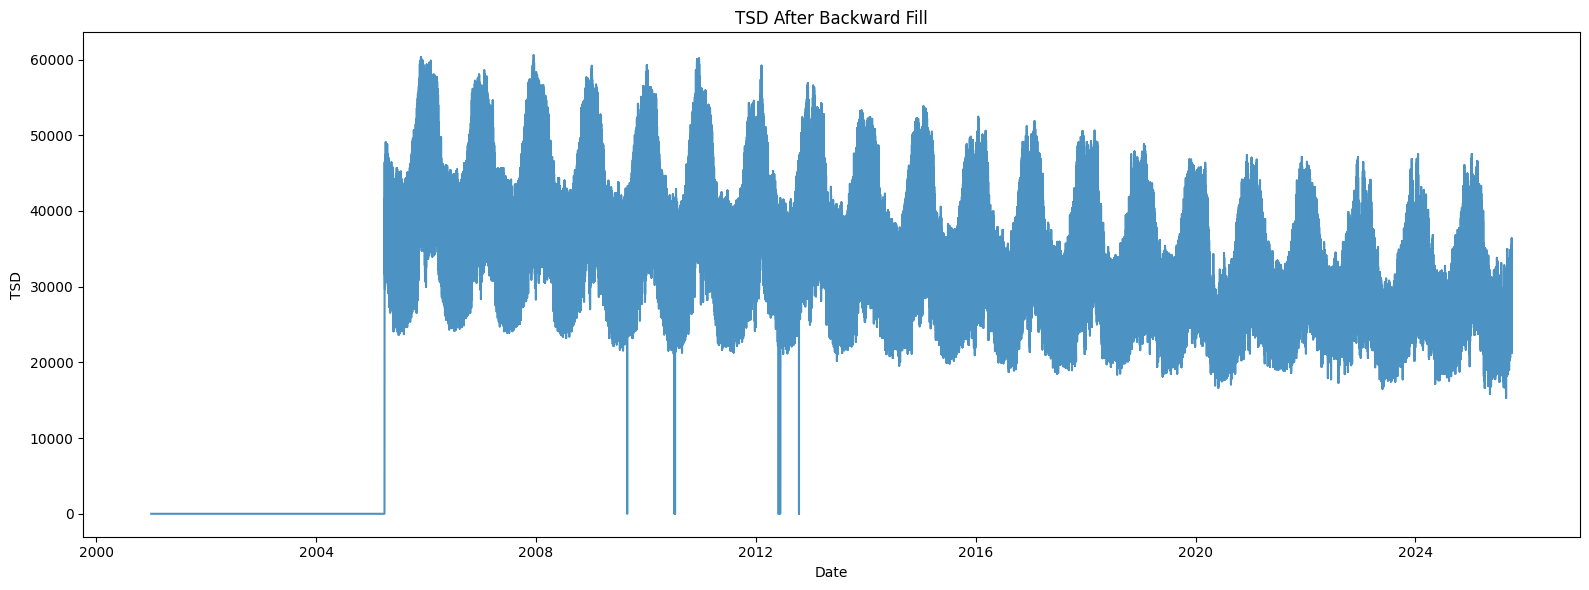

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(df['settlement_date'], df['tsd'], alpha=0.8)
plt.title("TSD After Backward Fill")
plt.xlabel("Date")
plt.ylabel("TSD")
plt.tight_layout()
plt.show()


In [ ]:
df_ffill = df_cleaned

df_ffill['tsd'] = df_ffill['tsd'].fillna(method='ffill')

C:\Users\thoma\AppData\Local\Temp\ipykernel_20472\2465284861.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['tsd'] = df_ffill['tsd'].fillna(method='ffill')


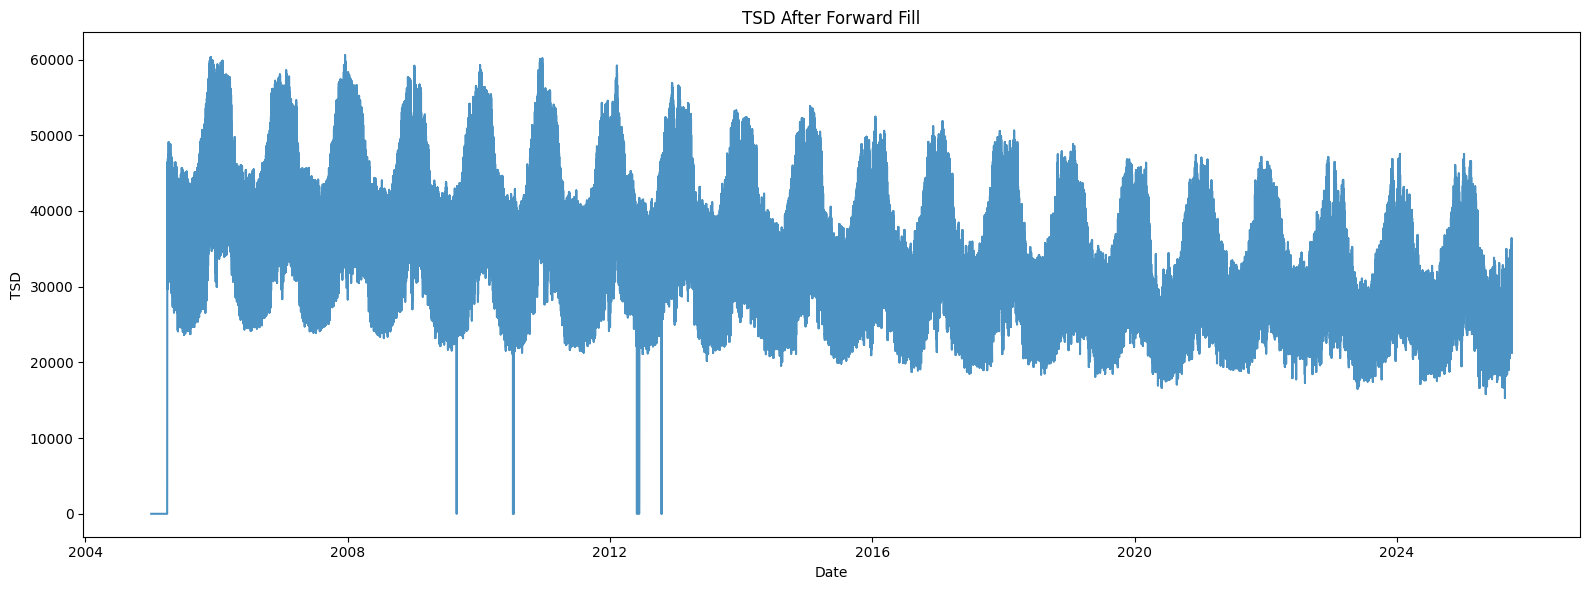

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(df_ffill['settlement_date'], df_ffill['tsd'], alpha=0.8)
plt.title("TSD After Forward Fill")
plt.xlabel("Date")
plt.ylabel("TSD")
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['settlement_date'] >= '2006-01-01'].reset_index(drop=True)

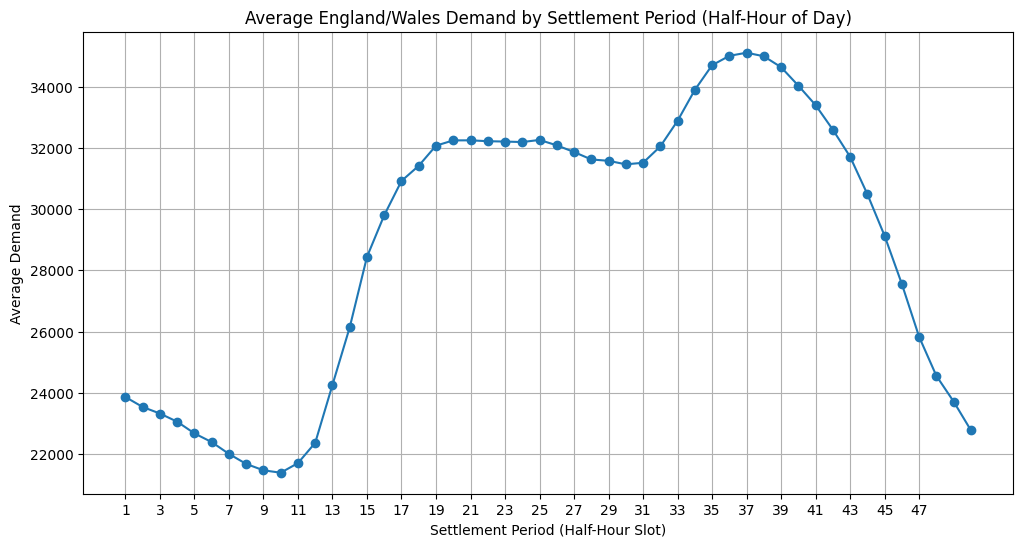

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure settlement_period is integer
df['settlement_period'] = df['settlement_period'].astype(int)

# Calculate average demand by settlement period (half-hour slots)
daily_seasonality = df.groupby('settlement_period')['england_wales_demand'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_seasonality.index, daily_seasonality.values, marker='o')
plt.title('Average England/Wales Demand by Settlement Period (Half-Hour of Day)')
plt.xlabel('Settlement Period (Half-Hour Slot)')
plt.ylabel('Average Demand')
plt.grid(True)
plt.xticks(range(1, 49, 2))
plt.show()


In [ ]:
print(df['settlement_period'].value_counts().sort_index())

settlement_period
1     7216
2     7216
3     7216
4     7216
5     7216
6     7216
7     7216
8     7216
9     7216
10    7216
11    7216
12    7216
13    7216
14    7216
15    7216
16    7216
17    7216
18    7216
19    7216
20    7216
21    7216
22    7216
23    7216
24    7216
25    7216
26    7216
27    7216
28    7216
29    7216
30    7216
31    7216
32    7216
33    7216
34    7216
35    7216
36    7216
37    7216
38    7216
39    7216
40    7216
41    7216
42    7216
43    7216
44    7216
45    7216
46    7216
47    7196
48    7196
49      19
50      19
Name: count, dtype: int64


In [ ]:
df = df[df['settlement_period'] <= 48]


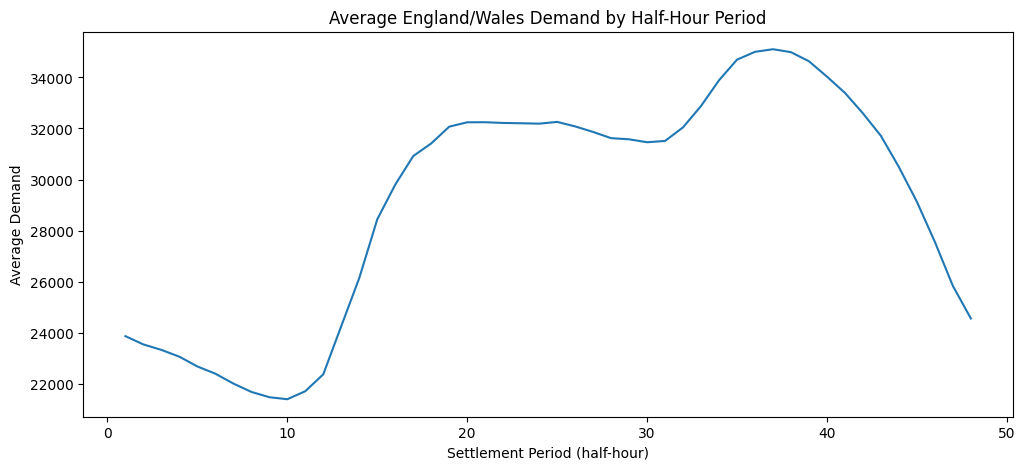

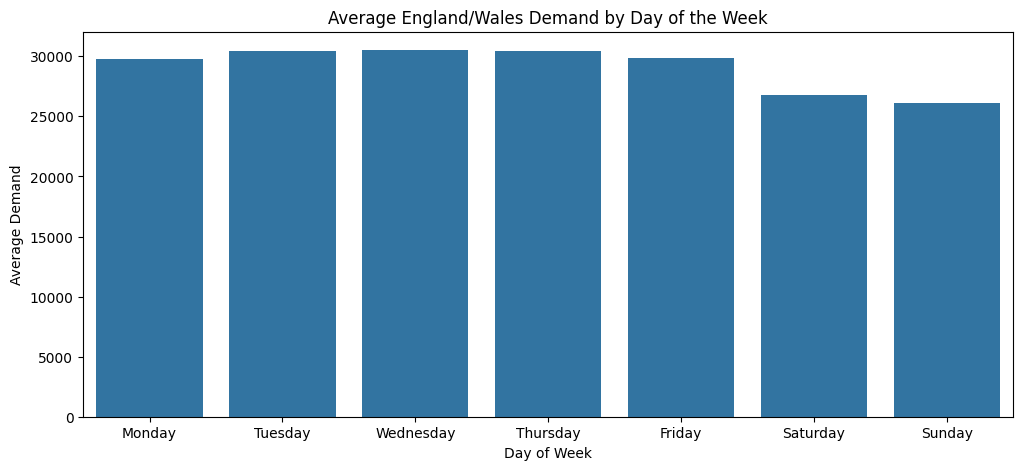

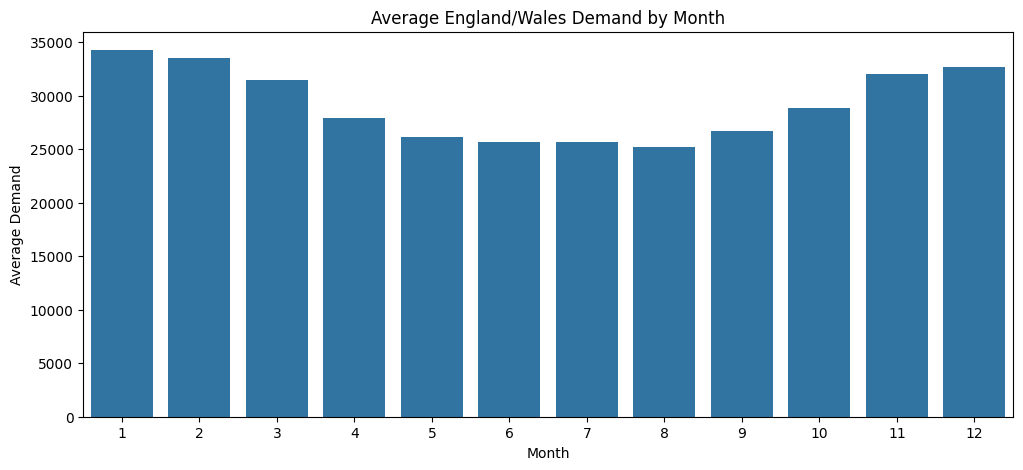

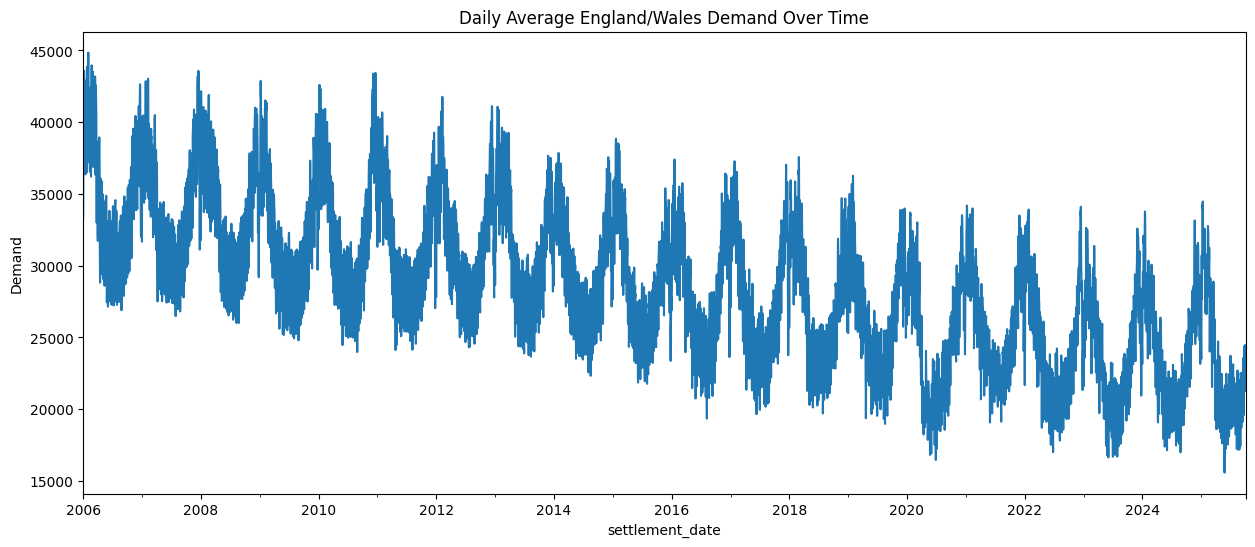

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format for settlement_date
df['settlement_date'] = pd.to_datetime(df['settlement_date'])

# Extract day of week and month
df['day_of_week'] = df['settlement_date'].dt.day_name()  # Monday, Tuesday...
df['month'] = df['settlement_date'].dt.month

# 1. Average demand by hour of the day (settlement_period)
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.groupby('settlement_period')['england_wales_demand'].mean())
plt.title('Average England/Wales Demand by Half-Hour Period')
plt.xlabel('Settlement Period (half-hour)')
plt.ylabel('Average Demand')
plt.show()

# 2. Average demand by day of the week
plt.figure(figsize=(12, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df.groupby('day_of_week')['england_wales_demand'].mean().reset_index(),
            x='day_of_week', y='england_wales_demand', order=order)
plt.title('Average England/Wales Demand by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Demand')
plt.show()

# 3. Average demand by month
plt.figure(figsize=(12, 5))
sns.barplot(data=df.groupby('month')['england_wales_demand'].mean().reset_index(),
            x='month', y='england_wales_demand')
plt.title('Average England/Wales Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.show()

# 4. Time series over several years
plt.figure(figsize=(15, 6))
# Resample daily to smooth out the half-hourly noise
daily_demand = df.set_index('settlement_date')['england_wales_demand'].resample('D').mean()
daily_demand.plot()
plt.title('Daily Average England/Wales Demand Over Time')
plt.ylabel('Demand')
plt.show()


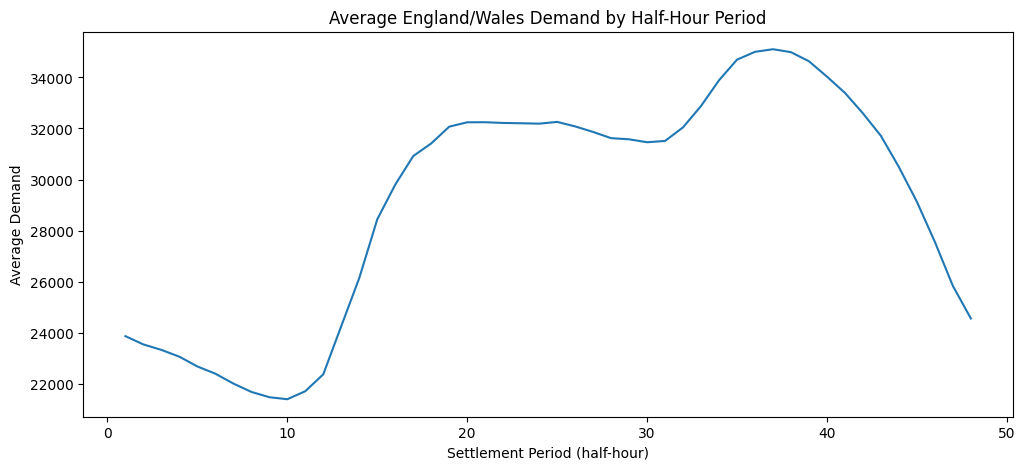

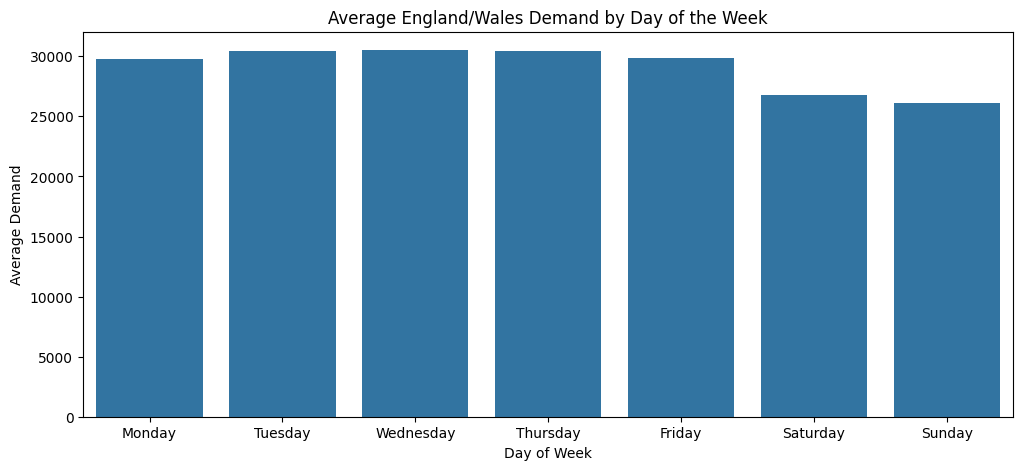

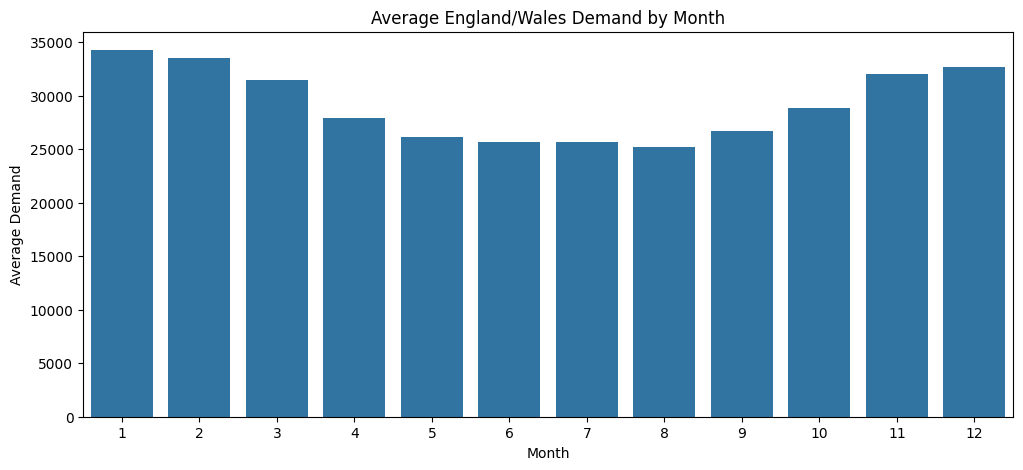

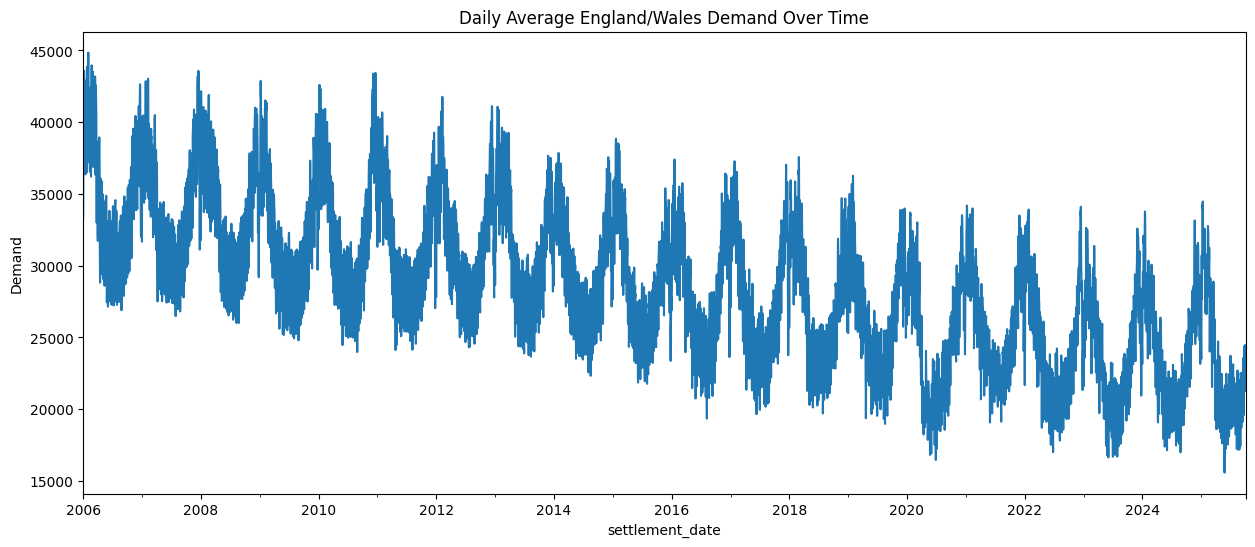

In [ ]:
import matplotlib.pyplot as plt

cols_to_plot = [
    'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation',
    'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity',
    'non_bm_stor', 'pump_storage_pumping', 'ifa_flow', 'ifa2_flow', 'britned_flow',
    'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow', 'eleclink_flow',
    'viking_flow', 'greenlink_flow'
]

nd: 7 outliers out of 434014 values
tsd: 5018 outliers out of 363886 values
england_wales_demand: 15 outliers out of 434014 values
embedded_wind_generation: 16481 outliers out of 434014 values
embedded_wind_capacity: 0 outliers out of 434014 values
embedded_solar_generation: 96877 outliers out of 434014 values
embedded_solar_capacity: 0 outliers out of 434014 values
non_bm_stor: 19353 outliers out of 434014 values
pump_storage_pumping: 51276 outliers out of 434014 values
ifa_flow: 2 outliers out of 434014 values
ifa2_flow: 85417 outliers out of 434014 values
britned_flow: 0 outliers out of 434014 values
moyle_flow: 5560 outliers out of 434014 values
east_west_flow: 168969 outliers out of 434014 values
nemo_flow: 113139 outliers out of 434014 values
nsl_flow: 73676 outliers out of 434014 values
eleclink_flow: 50776 outliers out of 434014 values
viking_flow: 28707 outliers out of 434014 values
greenlink_flow: 12268 outliers out of 434014 values


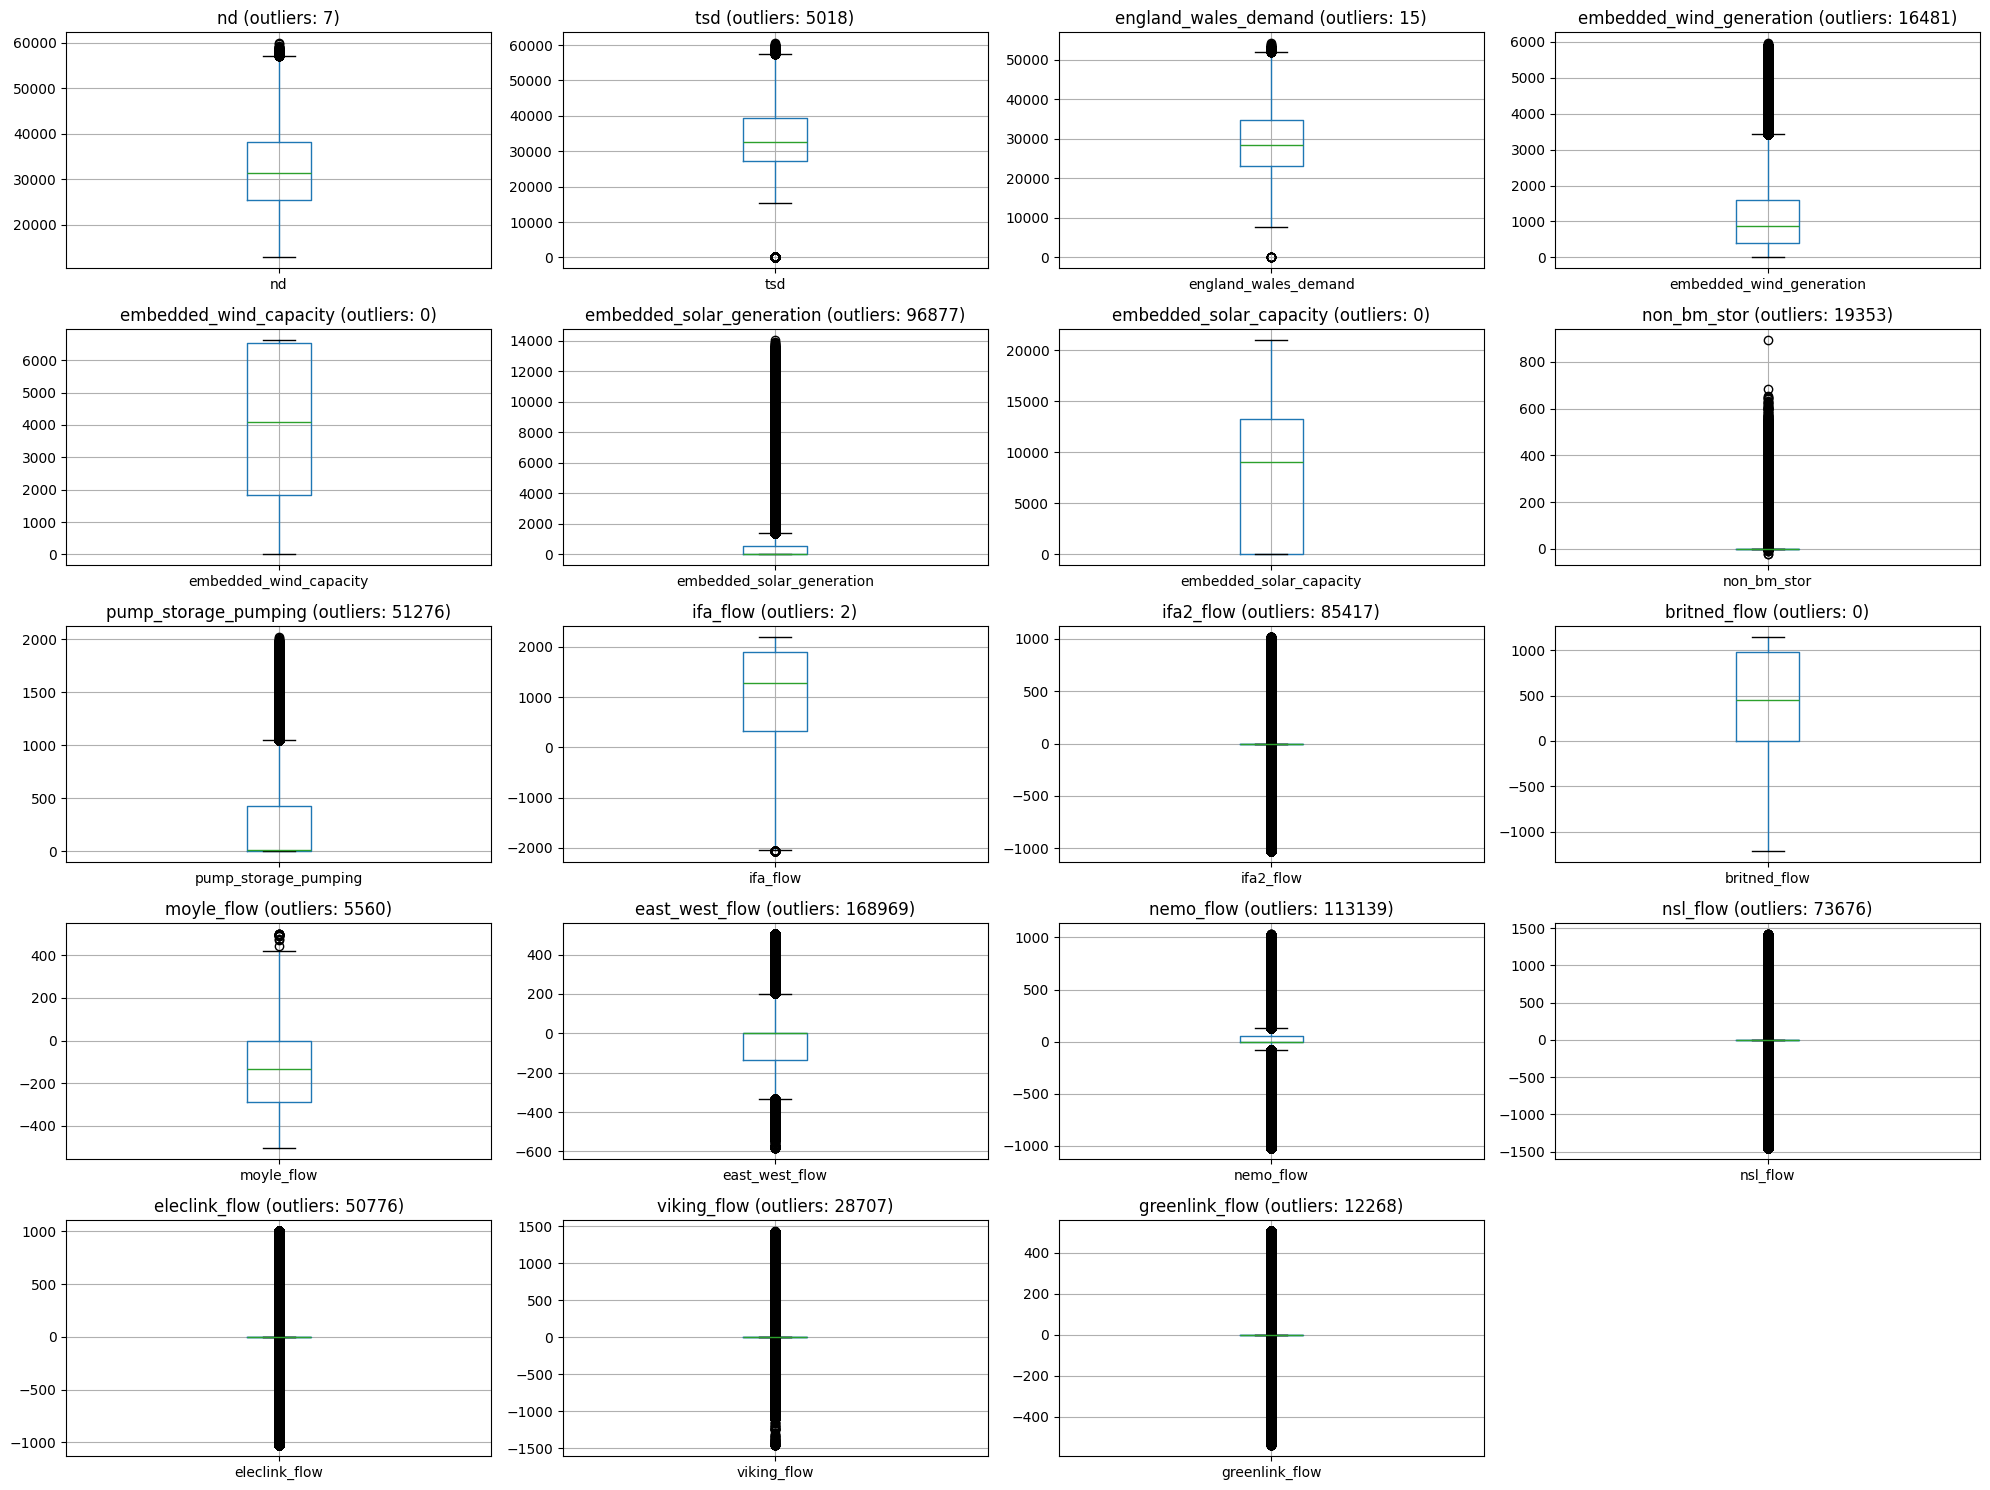

In [ ]:
import matplotlib.pyplot as plt

cols = cols_to_plot  # from previous message

plt.figure(figsize=(20, 15))

for i, col in enumerate(cols, 1):
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = len(outliers)
    
    print(f"{col}: {outlier_count} outliers out of {len(data)} values")
    
    plt.subplot(5, 4, i)
    # To zoom on central range (optional), comment/uncomment next 2 lines
    # plt.ylim(lower_bound, upper_bound)
    
    df.boxplot(column=col)
    plt.title(f"{col} (outliers: {outlier_count})")

plt.tight_layout()
plt.show()


In [ ]:
print(df['tsd'].isna().sum())
print(len(df))

0
346328
